In [20]:
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
df=pd.read_csv('EuStock.csv')
df=df.sample(frac=1)
x1=df['DAX']
x1_sq=x1**2
x2=df['SMI']
x2_sq=x2**2
x3=df['CAC']
x3_sq=x3**2

In [22]:
x1=(x1-x1.mean())/x1.std()
x1_sq=(x1_sq-x1_sq.mean())/x1_sq.std()
x2=(x2-x2.mean())/x2.std()
x2_sq=(x2_sq-x2_sq.mean())/x2_sq.std()
x3=(x3-x3.mean())/x3.std()
x3_sq=(x3_sq-x3_sq.mean())/x3_sq.std()


In [23]:
T1=0
T2=0
T3=0
T1_sq=0
T2_sq=0
T3_sq=0
T0=0

In [24]:
y=df['FTSE']
b=y.std()
c=y.mean()
n=float(len(y))
print(n)

1499.0


In [31]:
alpha=0.03
J=[]
m=[]
print('Training..')
for i in range(1000):
    h=T0+T1*x1+T2*x2+T3*x3+T1_sq*x1_sq+T2_sq*x2_sq+T3_sq*x3_sq
    J.append(sum([data**2 for data in (y-h)])/n)
    m.append(i)
    J0=-(2/n)*(sum(y-h))
    J1=-(2/n)*(sum((y-h)*x1))
    J2=-(2/n)*(sum((y-h)*x2))
    J3=-(2/n)*(sum((y-h)*x3))
    J1_sq=-(2/n)*(sum((y-h)*x1_sq))
    J2_sq=-(2/n)*(sum((y-h)*x2_sq))
    J3_sq=-(2/n)*(sum((y-h)*x3_sq))
    T0=T0-(alpha*J0)
    T1=T1-(alpha*J1)
    T2=T2-(alpha*J2)
    T3=T3-(alpha*J3)
    T1_sq=T1_sq-(alpha*J1_sq)
    T2_sq=T2_sq-(alpha*J2_sq)
    T3_sq=T3_sq-(alpha*J3_sq)   
y=df['FTSE']
print('Done..')

Training..
Done..


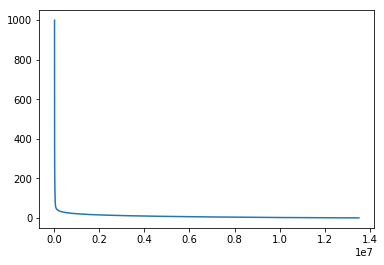

In [26]:
plt.plot(J,m)
plt.show()

In [27]:
err=(abs(h-y)*100)/y
print('Training Accuracy', 100-(sum(err)/n),'%')
print('Maximum deviation from Training Data :',err.max(),'%')

Training Accuracy 97.20075162411759 %
Maximum deviation from Training Data : 12.710035064851658 %


In [28]:
df2=pd.read_csv("Test_Data.csv")
df2=df2.sample(frac=1)
x1=df2['DAX']
x1_sq=x1**2
x2=df2['SMI']
x2_sq=x2**2
x3=df2['CAC']
x3_sq=x3**2

In [29]:
x1=(x1-x1.mean())/x1.std()
x1_sq=(x1_sq-x1_sq.mean())/x1_sq.std()
x2=(x2-x2.mean())/x2.std()
x2_sq=(x2_sq-x2_sq.mean())/x2_sq.std()
x3=(x3-x3.mean())/x3.std()
x3_sq=(x3_sq-x3_sq.mean())/x3_sq.std()

In [30]:
h=T0+T1*x1+T2*x2+T3*x3+T1_sq*x1_sq+T2_sq*x2_sq+T3_sq*x3_sq
y=df2['FTSE']
n=float(len(y))
err=(abs(h-y)/y)*100
print('Test Error',100-(sum(err)/n))
print('Maximum deviation from Test Data :',err.max())


Test Error 96.60864048553924
Maximum deviation from Test Data : 9.947149257245586
